In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Context

**A. Business Problem**:

A car insurance company aims to increase their revenue from the sales of car insurance policies by improving customer lifetime value (CLV). To achieve this, they need to predict CLV using the characteristics of their prospective customers based on the company's historical data. Additionally, they want to identify the factors that significantly affect CLV to make informed business decisions. They require a machine learning model that can accurately predict CLV and determine the factors that impact it.

The profit of an insurance company is the difference between the revenue collected from premiums and the expenses associated with paying out claims and running the business. So, the formula for profit would be:

**Profit = Total revenue - Total expenses**

The total revenue can be estimated as the sum of all premiums collected from customers over their lifetime, which can be calculated as:

**Lifetime revenue = Monthly premium auto * Customer lifetime value**

And the total expenses can include claims payouts, operating expenses, and other costs. So, the profit of an insurance company would be the difference between the lifetime revenue and total expenses:

**Profit = Lifetime revenue - Total expenses**

Meaning that when CLV is high, the lifetime revenue per customer to car insurance company is also higher. Then it will make the lifetime revenue of the company is also higher which means that the profit is also getting higher. The impact of CLV is good to raise the profit.

It's important to note that this is a simplified formula and doesn't take into account many factors that can affect an insurance company's profitability.

**B. Stakeholders**:

The car insurance company.

**C. Problem**:

* The car insurance company wants to increase its profits from the sales of car insurance policies.
* Identifying the factors that significantly affect CLV is difficult, making it challenging to make informed business decisions.

**D. Importance of the Problem**:

* Increasing CLV can help car insurance companies generate more revenue and reduce customer acquisition costs.
* Knowing what factors influence CLV can help companies make better-informed and effective business decisions.

**E. Goal**:

* To develop a machine learning model that can accurately predict CLV for each customer, thereby improving the car insurance company's revenue from the sales of car insurance policies. 
* Additionally, the model should identify the factors that impact CLV, which can help the company make informed business decisions.

**F. Analytic Approach**:

The analytical approach taken is to analyze the data in order to discover patterns from the existing features. Implementation of supervised machine learning and regression models will be performed as a tool to predict CLV and identify the factors that influence it. The creation of Machine Learning model, we will select the best model from several Machine Learning Models by measuring the performance error using Mean Absolute Percentage Error(MAPE). We will select the best model with the lowest (near 0) MAPE score evaluation. Then we will tune the model using hyperparameter to improve the performance by decreasing MAPE score. Lastly, we can use this best model to predict the CLV and identify the features importances. 

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


**Data Understanding**:

The dataset contains customer profile data of a car insurance company and their corresponding customer lifetime value (CLV). It consists of several columns including Vehicle Class, Coverage, Renew Offer Type, Employment Status, Marital Status, Education, Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, and Customer Lifetime Value.

Each row represents a customer and their characteristics such as the type of vehicle owned, type of insurance policy, type of offer provided, employment status, marital status, education, number of policies owned, monthly premium, total claims, income, and their CLV.

The dataset is relevant to the car insurance industry as it provides insights into the customer profiles and their CLV, which can be used to make informed business decisions.

In [4]:
df.describe(include='all')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669,5669,5669,5669,5669,5669,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2858,3477,2292,3541,3305,1703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,109.000000,549.986128,62464.000000,9031.214859


**Data Understanding**:

The dataset consists of several categorical columns including:

* Vehicle Class
* Coverage
* Renew Offer Type
* Employment Status
* Marital Status
* Education


The dataset also consists of several numerical columns, including:

* Number of Policies
* Monthly Premium Auto
* Total Claim Amount
* Income

The numerical dataset has different ranges or interquartiles, which can affect the performance of Machine Learning models. To anticipate this issue, we can use a scaler to standardize the numerical data and ensure it has the same range or interquartile, thereby maximizing the performance of the Machine Learning model.

Our target variable is Customer Lifetime Value, and we will use a Regression model since this variable has numerical continuous values.

In [5]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

**Data Understanding**:  

The dataset also has no missing data

# Exploratory Data Analysis

In this section we try to explore the data and find if there is something strange about the data

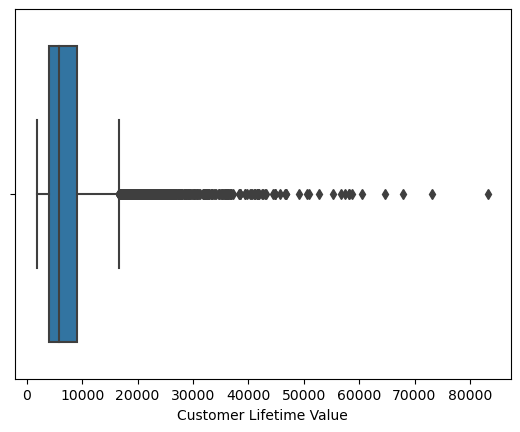

In [6]:
sns.boxplot(data=df, x='Customer Lifetime Value');

It can be observed that the target dataset exhibits an abnormal data distribution. This can potentially affect the performance of the Machine Learning model as it may overly focus on CLV values below 20000.

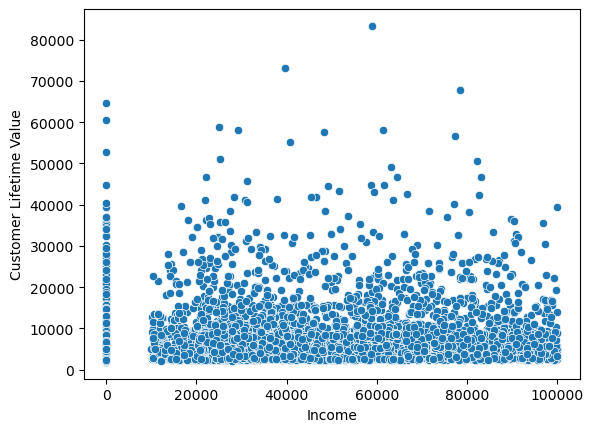

In [7]:
sns.scatterplot(data=df, x='Income', y='Customer Lifetime Value');

As can be seen from the scatter plot above, the Income Column does not have a close relationship with CLV. There are even some customers who have 0 income but still have Customer Lifetime Value, indicating that CLV can be more influenced by other features.

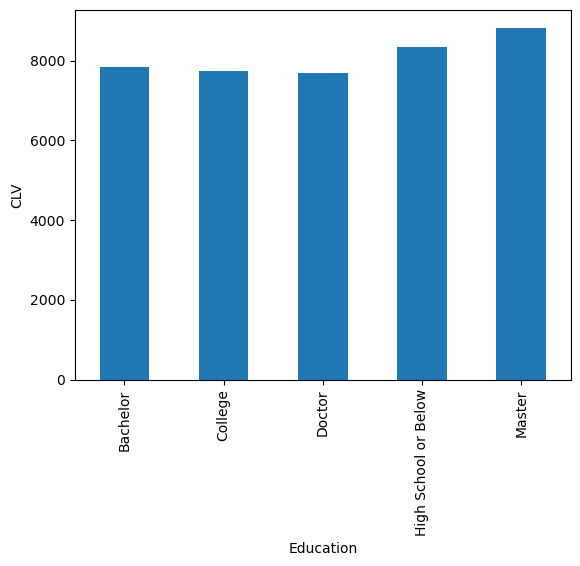

In [8]:
df.groupby('Education')['Customer Lifetime Value'].mean().plot(kind='bar')
plt.ylabel('CLV');

The distribution of the education column appears to be almost even, indicating that it does not have a significant effect on CLV.

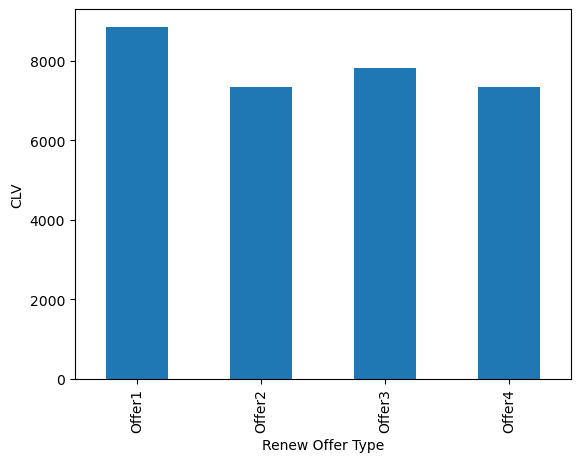

In [9]:
df.groupby('Renew Offer Type')['Customer Lifetime Value'].mean().plot(kind='bar');
plt.ylabel('CLV');

The same is true for the Renew Offer Type column, which has an almost even distribution.

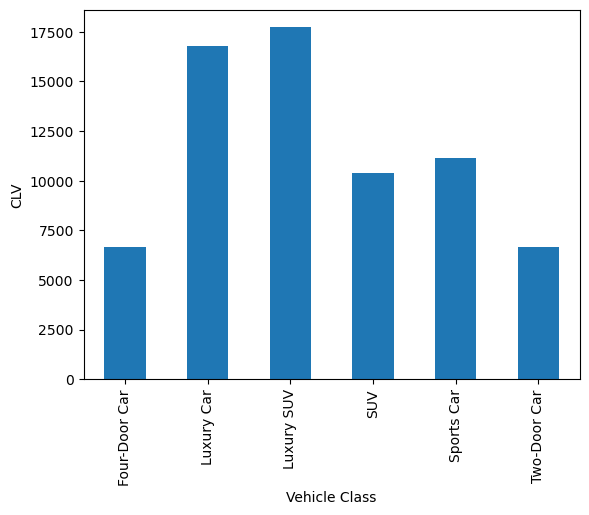

In [10]:
df.groupby('Vehicle Class')['Customer Lifetime Value'].mean().plot(kind='bar')
plt.ylabel('CLV');

It is highly likely that vehicle class can influence Customer Lifetime Value (CLV). This is supported by the graph above, which shows that luxury vehicles, such as Luxury Cars and Luxury SUVs, contribute to higher CLV.

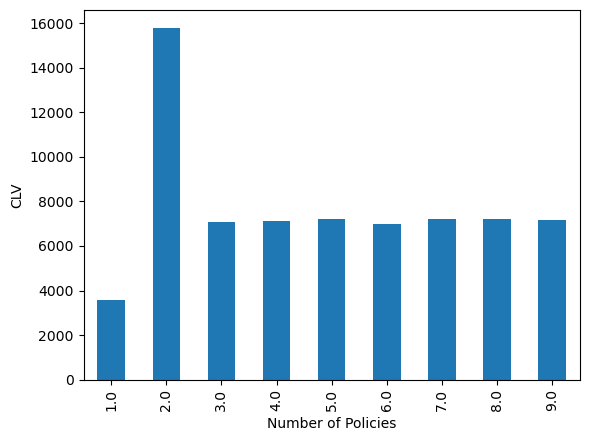

In [11]:
df.groupby('Number of Policies')['Customer Lifetime Value'].mean().plot(kind='bar')
plt.ylabel('CLV');

It is likely that Number of Policies can affect the prediction as we see from the graph above that 2.0 Policies have a high CLV while others don't. Meaning that the data representative of high CLV is not enough. 

# Data Preparation

In this section, we aim to prepare the data before inputting it into the Machine Learning model. To achieve this, we will use a Column Transformer to transform the necessary data into a certain scale for numerical columns and convert categorical columns into numerical values that the machine can learn from. Finally, we will split the data into a train set and test set before feeding it into the Machine Learning Model.

In [12]:
df.describe(include='all')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669,5669,5669,5669,5669,5669,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2858,3477,2292,3541,3305,1703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,109.000000,549.986128,62464.000000,9031.214859


**Transformer**

1. Numerical Continous Columns: Monthly Premium Auto, Total Claim Amount, Income  
    A.  We use Robustscaler() to fix the scale differences between these columns and we can also avoid the outlier using this scaler.    
      
2. Categorical Columns: Number of Policies, Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status, Education  
    A. Onehot Encoder (dummy) : Coverage, Renew Offer Type, Marital Status (N_unique <= 4)   
    B. Binary Encoder: Vehicle Class, EmploymentStatus, Education (N_unique > 4)

## Column Transformers

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders.binary import BinaryEncoder 


transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Monthly Premium Auto','Total Claim Amount','Income']),
    ('onehot', OneHotEncoder(drop='first'), ['Coverage','Renew Offer Type','Marital Status']),
    ('binary', BinaryEncoder(),['Vehicle Class','EmploymentStatus','Education'])
], remainder='passthrough')

We define the transformer using ColumnTransformer to input all the transformer function including scaler, onehot encoder and binary encoder, and the rest is still put inside of model using remainder='passthrough'.

## Train Test Split

In [14]:
x = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

We define the explanatory variables as variable 'x' and the response variable as 'y' which is the Customer Lifetime Value (CLV)

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

We split the whole dataset as xtrain, xtest, ytrain, and ytest which will be put inside our Machine Learning Model.

In [16]:
print('shape of xtrain:',xtrain.shape,'\nshape of xtest',xtest.shape,'\nshape of ytrain',ytrain.shape, '\nshape of ytest',ytest.shape)

shape of xtrain: (4535, 10) 
shape of xtest (1134, 10) 
shape of ytrain (4535,) 
shape of ytest (1134,)


We can see from above shape of each set that the test set is 20% from the whole dataset which will be used to test our Machine Learning Model later while the train set is 80% from the whole dataset which will be used to train our Machine Learning Model.

# Model

## Benchmark Model

Now we want to try the best model from the default mode of many models.

The models that we want to try are:
* linear regression,    
* knnregressor,  
* RandomForestRegressor,  
* SVRegressor,  
* regularized linear model,
* xgb regressor

In [17]:
# library

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In this case, we like to try several regression models such as:
1. Linear Regression : Linear regression is a type of statistical model used to predict the relationship between two continuous variables. In this method, a straight line (also known as a regression line) is fitted to a set of data points that represent the relationship between the two variables. The goal of linear regression is to identify the best-fit line that minimizes the distance between the predicted values and the actual values of the dependent variable.  

2. Lasso Regression: Lasso Regression is a type of linear regression that adds a penalty term to the cost function, in order to reduce the effect of less important features. It is used for feature selection and can reduce the impact of overfitting.

3. Ridge Regression: Ridge Regression is another type of linear regression that adds a penalty term to the cost function, but this time the penalty term is based on the sum of squared weights (L2 regularization). It is also used for feature selection and can reduce the impact of multicollinearity.

4. KNN Regressor: KNN (K-Nearest Neighbors) Regressor is a non-parametric regression model that predicts the output of a new data point by finding the K closest training data points, and taking the average of their outputs. It is simple and can handle non-linear relationships, but can be sensitive to outliers and can suffer from the curse of dimensionality.

5. SVR (Support Vector Regression): SVR is a regression model that uses the same principles as the SVM (Support Vector Machine) algorithm for classification. It finds a hyperplane that maximizes the margin between the predicted values and the actual values, while also allowing for some errors within a certain threshold. It is good for handling non-linear relationships and can handle large datasets, but can be sensitive to hyperparameter tuning.

6. Random Forest Regressor: Random Forest Regressor is an ensemble learning method that uses a collection of decision trees to make predictions. Each decision tree is trained on a random subset of the data, and the final prediction is the average of the predictions from all the trees. It can handle non-linear relationships and can capture complex interactions between features, but can be prone to overfitting.

7. XGB Regressor: XGB (Extreme Gradient Boosting) Regressor is another ensemble learning method that uses gradient boosting to train decision trees. It adds new trees to the model that predict the residual errors from the previous trees, and gradually reduces the error over many iterations. It is known for its high accuracy and can handle large datasets, but can be sensitive to hyperparameter tuning.





In [18]:
# Models definition

linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
knn = KNeighborsRegressor()
svr = SVR()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [19]:
list_algo = [linreg, lasso, ridge, knn, svr, rf, xgb]
list_score = []
list_mean = []
list_std = []

for model in list_algo:
    
    # pipeline berisi preprocessing dan modeling
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    cv_score = cross_val_score(
        estimator= pipe_model,
        X= xtrain,
        y= ytrain,
        cv= 5,
        scoring='neg_mean_absolute_percentage_error' # MAE
    )

    list_score.append(cv_score.round(1))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

df_cv = pd.DataFrame({
    'algo': [str(x) for x in list_algo],
    'mape': list_mean,
    'std': list_std,
    'all_score': list_score
})

df_cv

,algo,mape,std,all_score
0,LinearRegression(),-0.596330,0.007728,"[-0.6, -0.6, -0.6, -0.6, -0.6]"
1,Lasso(),-0.596553,0.007567,"[-0.6, -0.6, -0.6, -0.6, -0.6]"
2,Ridge(),-0.596396,0.007707,"[-0.6, -0.6, -0.6, -0.6, -0.6]"
3,KNeighborsRegressor(),-0.265686,0.007594,"[-0.3, -0.3, -0.3, -0.3, -0.3]"
4,SVR(),-0.493271,0.011927,"[-0.5, -0.5, -0.5, -0.5, -0.5]"
5,RandomForestRegressor(),-0.109292,0.006725,"[-0.1, -0.1, -0.1, -0.1, -0.1]"
6,"XGBRegressor(base_score=None, booster=None, ca...",-0.203788,0.004754,"[-0.2, -0.2, -0.2, -0.2, -0.2]"


We use MAPE for the metrics. MAPE stands for Mean Absolute Percentage Error. It is a metric used to evaluate the accuracy of a forecasting model by calculating the percentage difference between the predicted and actual values.

To calculate MAPE, the absolute error for each data point is first calculated by taking the absolute difference between the predicted value and the actual value. This absolute error is then divided by the actual value to obtain the percentage error. The average of these percentage errors is then calculated to obtain the MAPE.  

It is useful because it provides a relative measure of the accuracy of the forecast, meaning it can be used to compare the performance of different models or forecasting methods regardless of the scale of the data.  

MAPE is also more interpretable than other metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) because it is expressed as a percentage. This means that a MAPE of, say, 5% indicates that the model is on average off by 5% of the actual value. This can be easier for stakeholders to understand and interpret compared to a metric like RMSE, which is expressed in the same units as the data being forecasted.

From the model above, we take the best model which is Random Forest with the lowest Mean Absolute Percentage Error, around 10.9% from the actual value.

We use Random forest regressor which is machine learning algorithm used for regression problems. It is an ensemble method that builds multiple decision trees using bootstrap samples of the training data and random subsets of the features. The final prediction is made by aggregating the predictions of all the decision trees.  

Each decision tree is trained using a subset of the training data and a random subset of the features. This helps to reduce overfitting and improves the generalization ability of the model. The number of decision trees to be used in the model is a hyperparameter that can be tuned based on the performance on the validation set.  

The main advantage of using a random forest regressor is that it can handle a large number of input features and can automatically select the most important features for making the predictions. 

## Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Create a RandomForestRegressor model
rf = RandomForestRegressor()

# Create the random grid
random_grid = {'algo__n_estimators': [100, 150, 200],
               'algo__max_depth': [20, 30, 50, 80],
               'algo__max_features': [0.3, 0.6, 0.8],
               'algo__min_samples_leaf': [1, 5, 8, 10]}

# create pipeline
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('algo', rf)
    ])


rf_grid = GridSearchCV(scoring='neg_mean_absolute_percentage_error', estimator = pipe_model, param_grid = random_grid, cv = 5, verbose=3, n_jobs = -1)
# Fit the random search model
rf_grid.fit(xtrain, ytrain)


# Print the best hyperparameters
print(rf_grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
-0.10870840950103063


In the parameter grid for Random Forest Model, we have defined a set of hyperparameters and their corresponding values to be tuned during the training process. Here's what each hyperparameter means:

* n_estimators: The number of trees in the forest. In this case, we are trying values 100, 150, and 200.  
* max_depth: The maximum depth of each tree in the forest. The higher the depth, the more complex the model will be. In this case, we are trying values 20, 30, 50, and 80.
* max_features: The maximum number of features to consider when looking for the best split. A lower value can reduce overfitting, while a higher value can increase model performance. In this case, we are trying values 0.3, 0.6, and 0.8.
* min_samples_leaf: The minimum number of samples required to be at a leaf node. This can be used to control overfitting. In this case, we are trying values 1, 5, 8, and 10.
* The algo__ prefix in each parameter is used to indicate that the hyperparameters belong to the RandomForestRegressor algorithm, which is being used in a scikit-learn Pipeline object. This prefix is added to avoid any naming conflicts with other hyperparameters that may be present in the Pipeline object.

We tune the model using GridSearchCV, one of the tool in hyperparameter tuning besides randomizedsearchcv, using the parameter defined as random_grid, 5 times cross validation and with the scoring Mean Absolute Percentage Error (MAPE).  

After we tuned the random forest model, the performance is increased around 0.1%. It is not that significant but still important to notice that our model has improved.

In [21]:
# The best parameter

rf_grid.best_params_

{'algo__max_depth': 30,
 'algo__max_features': 0.6,
 'algo__min_samples_leaf': 1,
 'algo__n_estimators': 200}

In [22]:
# We define the best estimator for our random fores model as final_model

final_model = rf_grid.best_estimator_

In [23]:
from sklearn.metrics import mean_absolute_percentage_error

final_model.fit(xtrain,ytrain)
y_pred_fmodel = final_model.predict(xtest)
print('MAPE score in training',abs(rf_grid.best_score_),'\n\nMAPE score in testing',mean_absolute_percentage_error(ytest, y_pred_fmodel))

MAPE score in training 0.10870840950103063 

MAPE score in testing 0.12092505542145185


As we see that using the best parameter, it shows that the difference between MAPE score in training and testing is around 2.6% which is not too far away from the training score. It is still good model as it yields error around 10.8%-12.2% which is not significantly changed.

----------------------------------------------------

# Residual Analysis

With Residual Analysis, we can understand more about our model on how far our model can perform and what is its limitation.

In [24]:
# Find the residual values

resid = ytest-y_pred_fmodel
resid.head()

3528   -5285.189624
5359      -0.844697
1858     -18.444451
2523      -1.614394
4412    -176.686455
Name: Customer Lifetime Value, dtype: float64

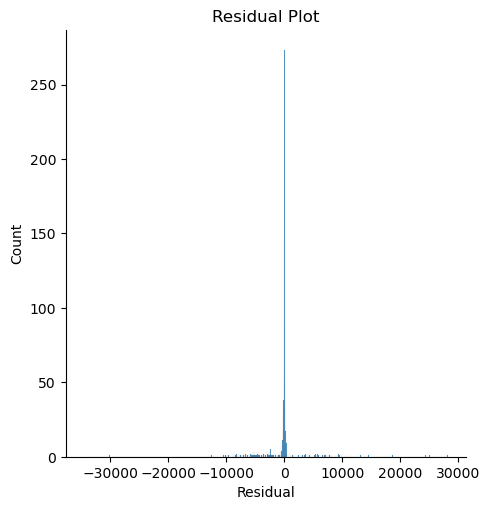

In [25]:
sns.displot(resid)
plt.xlabel('Residual')
plt.title('Residual Plot')

plt.show()

We can see from the graph above that the residual plot is already normally distributed around 0 which is good for the model but it still have many huge residual around -10.000 and 10.000 residual point.

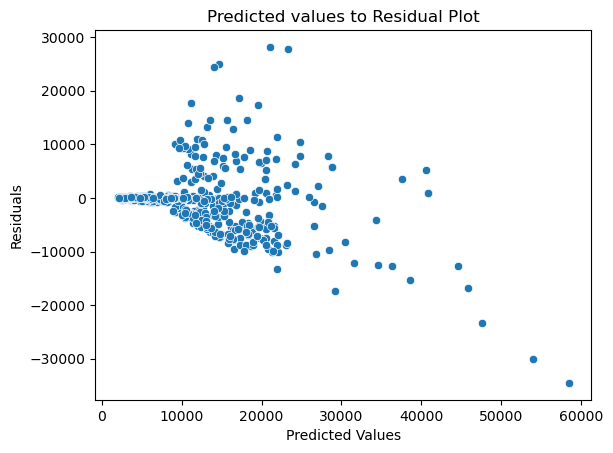

In [26]:
sns.scatterplot(x=y_pred_fmodel, y=resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted values to Residual Plot")
plt.show()

The graph can tell us more about the model. It shows that most of the data has the residual around 0 which is good. However, the higher predicted values are, the residuals are also getting high. It means that our model is lack in predicting the high Customer Lifetime Values.

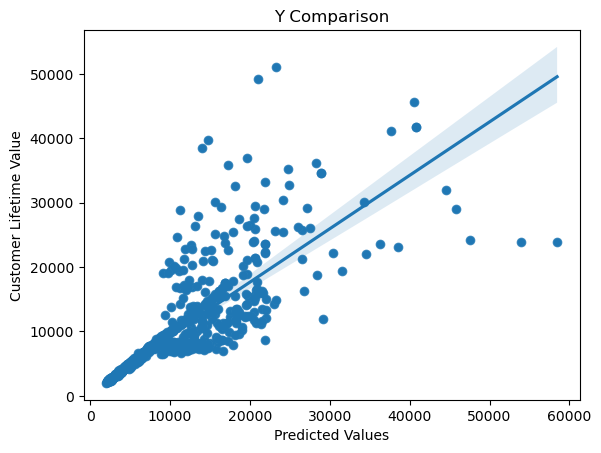

In [27]:
sns.scatterplot(x=y_pred_fmodel,y= ytest)
plt.xlabel("Predicted Values")
plt.ylabel("Y True")

sns.regplot(x=y_pred_fmodel, y=ytest)
plt.title("Y Comparison")
plt.show()

The graph above also bolding the previous analysis that the higher Customer Lifetime Prediction Values, the more it can't predict Customer Lifetime Value accurately as it is plotted far from 0 diagonal line.

------------------

# Feature Importances

In checking the feature importances from our model we can use jcopml library, created by Mr. Wira Dharma Kencana Putra. This library can check directly the feature importance from the model using mean_score_decrease function. The higher the mean_score_decrease value, the feature is more important.  

,feature,importance,stdev
6,Number of Policies,1.313690,0.028374
7,Monthly Premium Auto,0.651001,0.018001
8,Total Claim Amount,0.134327,0.002690
9,Income,0.104410,0.003159
0,Vehicle Class,0.061904,0.002426
5,Education,0.049192,0.003705
2,Renew Offer Type,0.041590,0.001876
4,Marital Status,0.036855,0.004151
3,EmploymentStatus,0.023175,0.001234
1,Coverage,0.020816,0.001127


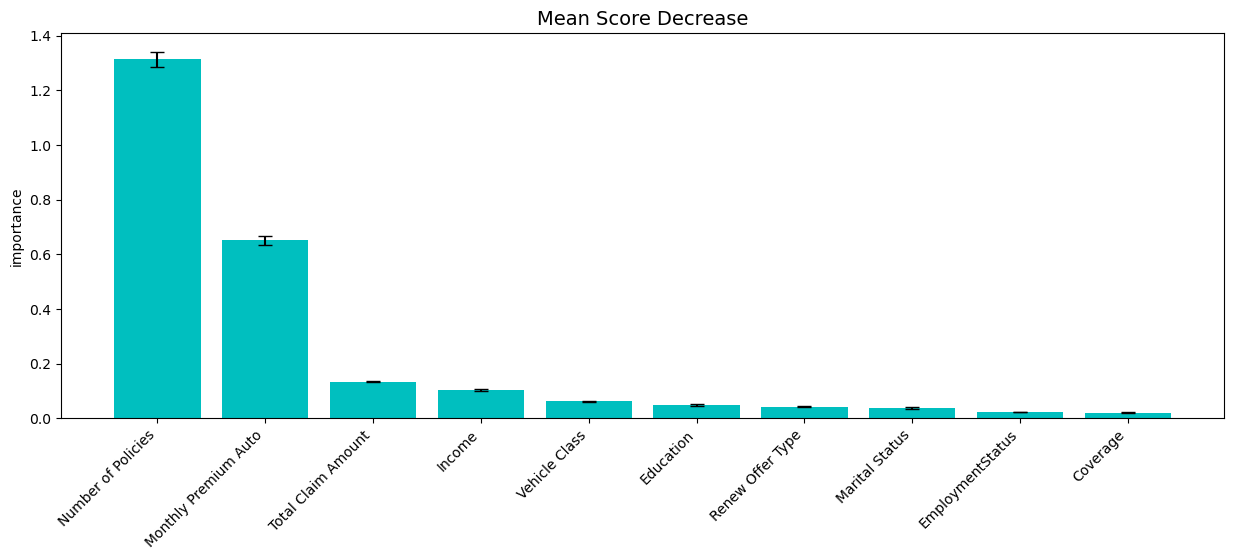

In [28]:
from jcopml.feature_importance import mean_score_decrease

mean_score_decrease(xtrain, ytrain, final_model, plot=True)

We can see from the table and graph above that Number of Policies and Monthly Premium Auto columns are the most important feature from the dataset. Meaning that those columns contribute more to the our target variable.  

We also can validate the library above manually.

In [29]:
# Searching the feature importances manually

final_model['algo'].feature_importances_.shape

(20,)

In [30]:
final_model['preprocessing']

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(),
                                 ['Monthly Premium Auto', 'Total Claim Amount',
                                  'Income']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Coverage', 'Renew Offer Type',
                                  'Marital Status']),
                                ('binary', BinaryEncoder(),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Education'])])

In [31]:
final_model['preprocessing'].transformers_[0][1].get_feature_names_out()

array(['Monthly Premium Auto', 'Total Claim Amount', 'Income'],
      dtype=object)

In [32]:
final_model['preprocessing'].transformers_[1][1].get_feature_names_out()

array(['Coverage_Extended', 'Coverage_Premium', 'Renew Offer Type_Offer2',
       'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4',
       'Marital Status_Married', 'Marital Status_Single'], dtype=object)

In [33]:
final_model['preprocessing'].transformers_[2][1].get_feature_names_out()

['Vehicle Class_0',
 'Vehicle Class_1',
 'Vehicle Class_2',
 'EmploymentStatus_0',
 'EmploymentStatus_1',
 'EmploymentStatus_2',
 'Education_0',
 'Education_1',
 'Education_2']

In [34]:
x.columns[final_model['preprocessing'].transformers_[3][2]]

Index(['Number of Policies'], dtype='object')

In [35]:
feature=list(final_model['preprocessing'].transformers_[0][1].get_feature_names_out())+list(final_model['preprocessing'].transformers_[1][1].get_feature_names_out()) + final_model['preprocessing'].transformers_[2][1].get_feature_names_out() + list(x.columns[final_model['preprocessing'].transformers_[3][2]])
feature

['Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Coverage_Extended',
 'Coverage_Premium',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Marital Status_Married',
 'Marital Status_Single',
 'Vehicle Class_0',
 'Vehicle Class_1',
 'Vehicle Class_2',
 'EmploymentStatus_0',
 'EmploymentStatus_1',
 'EmploymentStatus_2',
 'Education_0',
 'Education_1',
 'Education_2',
 'Number of Policies']

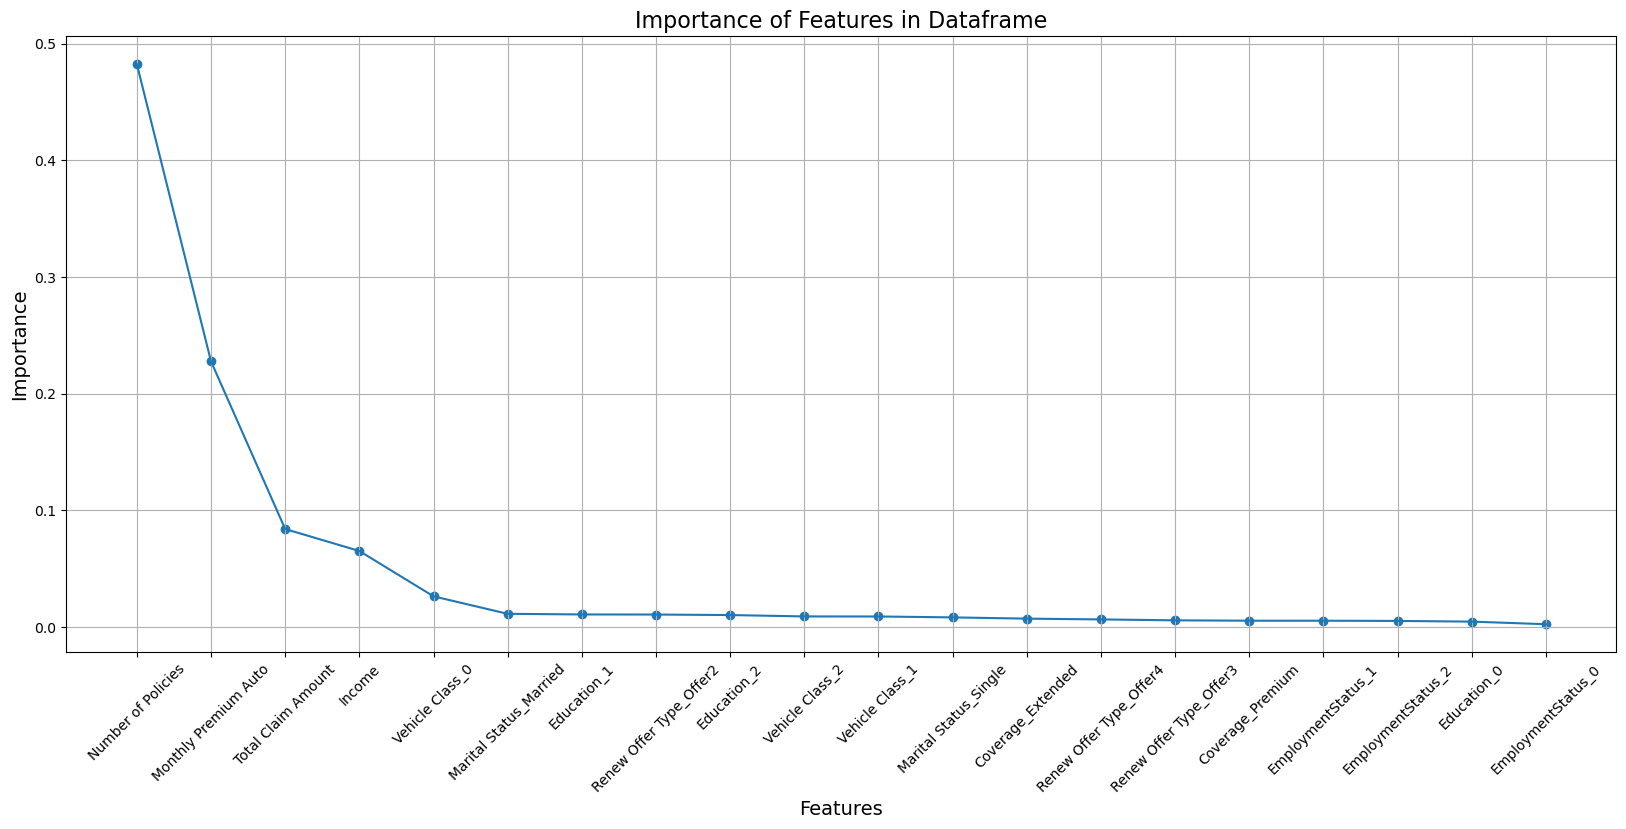

In [36]:
# Computing feature importance
feature_importances = pd.DataFrame(final_model['algo'].feature_importances_,
                                   index = feature,
                                   columns=['importance']).sort_values('importance',ascending=False)

# Plotting feature importance
plt.figure(figsize=(20,8))
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.title('Importance of Features in Dataframe', fontsize = 16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize = 14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

The result of our manual feature importance technique is still the same with using the jcopml library. It still stated that Number of Policies and Monthly Premium Auto contributed more to the target variable.

# Further Analysis

By seeing the most important feature, which is Number of Policies, we want to see why this feature contribute more to the target and answer the main question of our model problem, which is why our model failed(high residual value) in predicting the higher Customer Lifetime Values. 

In [37]:
# Checking the data details with the residual score more than 100

high_resid_data = df.loc[list(resid[resid>100].index)]

high_resid_data[high_resid_data['Customer Lifetime Value']>9000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
1101,Four-Door Car,Basic,Offer1,Unemployed,Single,College,2.0,72.0,345.600000,0.0,16702.69914
132,Two-Door Car,Basic,Offer1,Medical Leave,Single,High School or Below,2.0,70.0,75.393383,13164.0,18061.91837
724,SUV,Premium,Offer1,Employed,Married,Bachelor,5.0,167.0,801.600000,25048.0,13406.92021
4589,Sports Car,Extended,Offer4,Employed,Single,College,2.0,128.0,48.517439,97298.0,30475.78048
2518,SUV,Premium,Offer1,Employed,Married,College,7.0,146.0,503.144025,92931.0,11830.95192
...,...,...,...,...,...,...,...,...,...,...,...
3590,Sports Car,Basic,Offer4,Employed,Married,High School or Below,2.0,117.0,436.533172,59130.0,33279.77231
3309,Two-Door Car,Extended,Offer2,Retired,Married,Master,2.0,85.0,574.024018,19614.0,16301.96760
4634,Four-Door Car,Extended,Offer2,Medical Leave,Married,Bachelor,2.0,81.0,494.890996,16113.0,20885.55547
582,Four-Door Car,Basic,Offer1,Unemployed,Married,High School or Below,2.0,61.0,370.755025,0.0,13786.70272


In [38]:
df['Number of Policies'].value_counts()

1.0    2008
2.0    1413
3.0     727
7.0     271
5.0     270
9.0     264
4.0     251
6.0     236
8.0     229
Name: Number of Policies, dtype: int64

Seeing the distribution data per Number of Policies make a significant answer of why our model is hard to predict the high Customer Lifetime Values. The answer is that the most of data is distributed more on Number of Policies 1.0 and 2.0, while the rest have very low distribution of data (around 200-700 data). This can make our model bias on the 1.0 and 2.0 Number of Policies. Meaning that we need to increase the data representative around number of policies 3.0 until 9.0 to make the model more robust.

<AxesSubplot: xlabel='Number of Policies', ylabel='Customer Lifetime Value'>

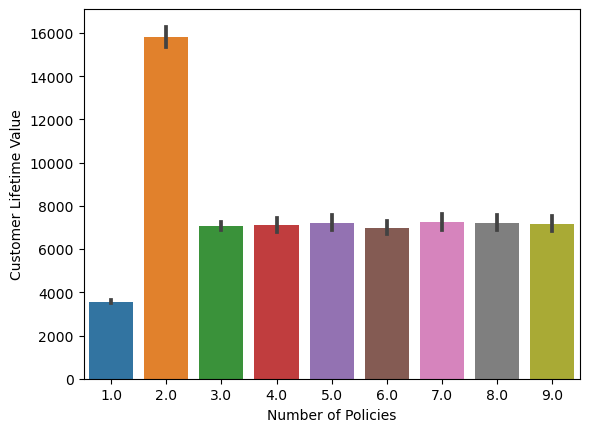

In [39]:
sns.barplot(x=df['Number of Policies'], y=df['Customer Lifetime Value'])

After seeing what causes the high residual in the dataset, we can conclude that our model only learned that the high Customer Lifetime Values is mostly located in number of policies == 2.0. This will affect the performance as we are not having enough data for the high customer lifetime values with the number of policies other than 2.0. Then, it makes our model is hard to predict the high customer lifetime values as we lack of data.

<AxesSubplot: xlabel='Monthly Premium Auto', ylabel='Customer Lifetime Value'>

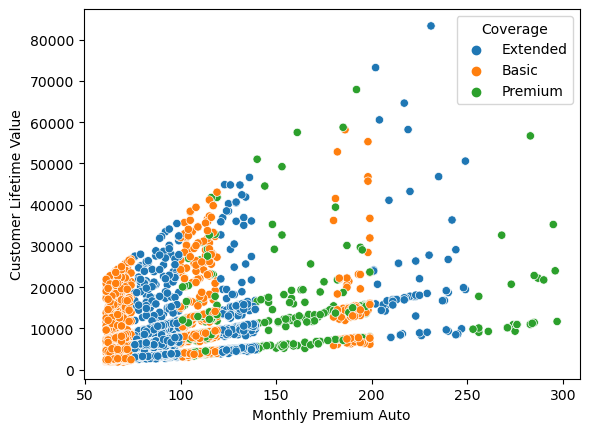

In [40]:
sns.scatterplot(x=df['Monthly Premium Auto'], y=df['Customer Lifetime Value'], hue=df['Coverage'])

As the graphic above, we can see that for the Monthly Premium Auto below 150 is more densed than 150 above. Then, we can conclude that we are not having enough data for Monthly Premium Auto above 150 as it not densed enough. That is why our model is hard to predict the high Customer Lifetime Value as we are lack of the representative data for the high Customer Lifetime Value.

-------------------

# Trial Dropping Data

Let's try by dropping the Number of Policies of 2.0 and see how the model performed after the values is dropped. We assume that by dropping the Number of Policies of 2.0 can make the model more robust and not bias by defining 2.0 Number of Policies will contribute to the high Customer Lifetime Values.

In [41]:
# We can protect our main data by making a copied dataframe.

dataset_coba2 = df[~(df['Number of Policies']==2)].copy()
dataset_coba2

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
5,SUV,Basic,Offer2,Employed,Married,Bachelor,8.0,107.0,85.063708,94389.0,8649.700578
7,Four-Door Car,Basic,Offer2,Employed,Married,College,1.0,66.0,144.987956,26477.0,2621.116054
...,...,...,...,...,...,...,...,...,...,...,...
5662,Luxury Car,Premium,Offer2,Employed,Married,Doctor,9.0,296.0,498.159874,79655.0,23984.621440
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7.0,239.0,1294.700423,22705.0,19160.989940


In [42]:
# Train test split

x2 = dataset_coba2.drop(columns=['Customer Lifetime Value'])
y2 = dataset_coba2['Customer Lifetime Value']

In [43]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x,y, test_size=0.2, random_state=42)

In [44]:
# use our final_model to train and predict

final_model.fit(xtrain2,ytrain2)
y_pred_fmodel2 = final_model.predict(xtest2)
mean_absolute_percentage_error(ytest2, y_pred_fmodel2)

0.12254611557362766

It is shown that the performance score is increased after dropping Number of Policies = 2 around 0.1%.

In [45]:
resid2 = ytest2-y_pred_fmodel2
resid2.head()

3528   -5157.396156
5359       0.117063
1858      -6.748154
2523     -14.997365
4412    -232.294855
Name: Customer Lifetime Value, dtype: float64

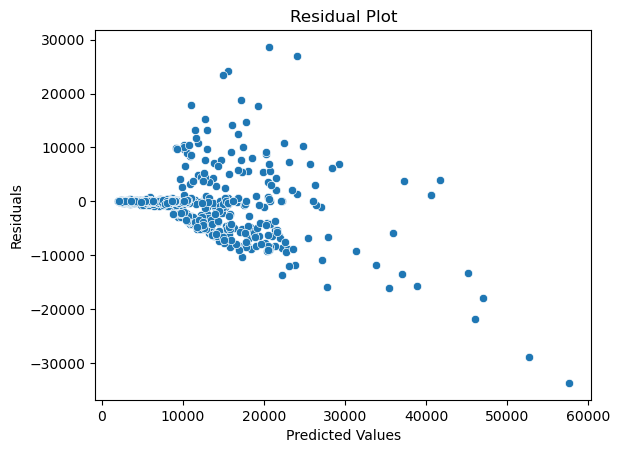

In [46]:
sns.scatterplot(x=y_pred_fmodel2, y=resid2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

We can see from the graph above that it still has many predicted values which are far from 0 residuals. It is not significantly good but still produce better performance than without dropping 2.0 Number of Policies. But our model is still lack in predicting the high CLV so we still need to get more data on High CLV so our model can predict the high CLV in the future.

# Save Model

In [47]:
# save the model to a file using pickle
import pickle

filename = 'Apip_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

# Conclusion

Our analysis involved several key steps in preparing the data and developing the machine learning model. Firstly, we performed data preprocessing to prepare the data for analysis. We transformed the continuous numerical variables using Robust Scaler to minimize the influence of outliers, while the categorical variables were encoded using One Hot Encoding and Binary Encoding to convert them into numerical variables that the model could interpret.

Next, we developed a benchmark model to compare the performance of several models and find the best fit for our data. We evaluated the models based on the Mean Absolute Percentage Error (MAPE) metric and found that the Random Forest Regressor model performed the best with a **MAPE score of 0.109**.

After selecting the Random Forest Regressor model, we further optimized the model by tuning its hyperparameters. This involved adjusting various model parameters, such as the number of trees and the maximum depth of each tree, to improve the model's performance. This tuning process resulted in a slight improvement in the model's performance, with an increased score of 0.1%.

Lastly, we conducted residual analysis to evaluate the performance of the model and identify any limitations. The residual analysis revealed that the model had difficulty predicting high CLV values, which we noted previously. However, we also found that the model performed well overall, with a prediction error of only 12% compared to the actual values.

In conclusion, our machine learning model provides a valuable tool for predicting customer lifetime value and identifying potential high-value customers. We recommend further refinement of the model by incorporating more relevant information especially **Number of Policies and Monthly Premium Auto Values** as those features are more **important than other features** then we can improve its ability to predict high CLV values. By continuing to refine and improve the model, we can help drive business success and increase profitability for the company and more focus on the desired features.

# Recommendation

Based on the conclusion, there are several recommendations that can be made to improve the machine learning model and its application:

1. Incorporate more relevant information: The model could be improved by incorporating additional features, particularly the Number of Policies and Monthly Premium Auto values, which were found to be important predictors of CLV.

2. Obtain more data on high CLV customers: The model had difficulty predicting high CLV values, so obtaining more data on these customers would improve the model's accuracy.

3. Address the overfitting issue: The model showed a slight overfitting issue, which could be addressed by adjusting the model's parameters or using a different algorithm.

4. Refine the model through further tuning: The model could be further refined by tuning its hyperparameters and evaluating its performance with residual analysis.

5. Utilize the model to identify potential high-value customers: By using the model to predict CLV, the company can identify potential high-value customers and take proactive measures to retain them, such as offering personalized promotions or incentives.

6. Monitor feature importance to anticipate changes in CLV: As the market and customer behavior evolve over time, certain features may become more or less important predictors of CLV. By monitoring the feature importance of the model and conducting regular updates, the company can anticipate changes in CLV and adjust their strategy accordingly. For example, if the model shows that customer tenure becomes a more important predictor of CLV, the company can adjust their retention strategy to focus more on retaining long-term customers. Similarly, if the model shows that certain demographics or product features become less important predictors of CLV, the company can adjust their marketing strategy to focus on other areas. By staying proactive in monitoring and updating the model's feature importance, the company can ensure that their CLV predictions remain accurate and effective in driving business decisions.

Overall, the Random Forest model provides a valuable tool for improving business decisions and driving profitability for the company. By implementing the recommendations above and continuing to refine the model, the company can optimize its use and achieve even greater success.